In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import Dense

In [3]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

### Weather Data set 

In [4]:
dir_path_dataset_1 = 'C:/Users/anand/Downloads/Weather report 2008 -2010.csv'


### Load Dataset

In [5]:
df_ALL = pd.read_csv('C:/Users/anand/Downloads/Weather report 2008 -2010.csv')


In [6]:
df_ALL.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71,22,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44,25,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38,30,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45,16,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82,33,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Breif Exploratory Data Analysis

In [7]:
df_ALL.shape

(500, 23)

In [8]:
df_ALL.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Statistics summary

In [9]:
df_ALL.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,500.000000,500.00000,495.000000,0.0,0.0,494.000000,497.000000,497.000000,500.000000,500.000000,500.000000,500.000000,164.000000,176.000000,500.000000,500.000000
mean,11.113600,24.87640,1.508283,NaN,NaN,35.259109,8.376258,14.919517,67.006000,40.938000,1016.781600,1013.996600,6.103659,5.113636,15.920200,23.615800
std,6.091241,8.22335,5.040909,NaN,NaN,14.723884,7.072014,7.867704,18.291723,20.660878,6.859686,6.702245,2.575531,2.921572,6.466502,8.002743
min,-2.000000,8.20000,0.000000,NaN,NaN,11.000000,0.000000,0.000000,20.000000,7.000000,994.300000,993.000000,0.000000,1.000000,1.900000,7.300000
25%,6.500000,17.67500,0.000000,NaN,NaN,24.000000,4.000000,9.000000,51.000000,24.000000,1011.600000,1008.800000,4.000000,2.000000,10.575000,16.675000
50%,11.300000,25.30000,0.000000,NaN,NaN,33.000000,7.000000,13.000000,68.000000,38.000000,1016.650000,1013.750000,8.000000,6.000000,16.000000,24.100000
75%,15.600000,31.30000,0.400000,NaN,NaN,43.750000,11.000000,20.000000,82.000000,56.000000,1021.925000,1019.025000,8.000000,8.000000,20.825000,29.725000
max,28.300000,44.80000,66.000000,NaN,NaN,107.000000,37.000000,50.000000,99.000000,97.000000,1036.300000,1033.600000,8.000000,8.000000,34.500000,43.400000


In [10]:
### Filtering all other atributes

In [11]:
df = df_ALL.iloc[:,3:4]


In [12]:
df.head()

,MaxTemp
0,22.9
1,25.1
2,25.7
3,28.0
4,32.3


<AxesSubplot:>

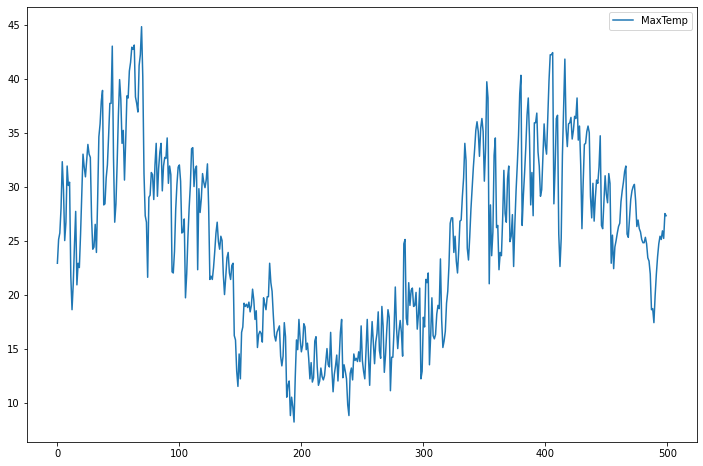

In [13]:
df.plot(figsize=(12,8))

In [14]:
length60=60

In [15]:
length60

60

###Time Series Dataste: Train / test Split 

In [16]:
len(df)

500

In [17]:
test_percent = 0.1

In [18]:
len(df)*test_percent

50.0

### Split-> Train /test

In [19]:
test_length= np.round(len(df)*test_percent)
test_length

50.0

In [20]:
split_index = int(len(df) - test_length)

split_index

450

In [21]:
data_train= df.iloc[: split_index]
data_test = df.iloc[split_index - length60 :]

In [22]:
data_train.head(5)

,MaxTemp
0,22.9
1,25.1
2,25.7
3,28.0
4,32.3


In [23]:
data_train.tail()

,MaxTemp
445,34.7
446,26.4
447,26.1
448,28.5
449,31.0


In [24]:
data_test.head(5)

,MaxTemp
390,27.3
391,35.9
392,35.9
393,36.8
394,33.2


In [25]:
data_test.tail()

,MaxTemp
495,25.1
496,25.9
497,25.2
498,27.5
499,27.3


### Normalize Data (scaling)

In [26]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(data_train)

MinMaxScaler()

In [28]:
normalized_train= scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

### Create TimeseriesGenerator for Training

In [29]:
batch_size32 = 32
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [30]:
len(normalized_train)

450

In [31]:
len(train_tsGenerator60)

13

In [32]:
X,Y = train_tsGenerator60[0]

### Build, Train and test Model

In [33]:
n_features = 1

In [34]:
## Define Model
model = Sequential()

# Add an LSTM Layer
# This Layer has 50 LSTM Cells
# Activation Function: relu
# MUST: return_sequences=True
#-----> Because of multiple LSTM layers: the layers are stacked
#-----> Outputs = inputs of the next LSTM layer
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(length60, n_features)))

## Dropout Layer
model.add(Dropout(0.1))

## Add 2nd LSTM Layer
# MUST: return_sequences=True
#----> Because of multiple LSTM layers: Layers are Stacked
#----> Outputs = inputs of the next LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))

## Dropout Layer
model.add(Dropout(0.1))

## Add 3rd LSTM Layer
model.add(LSTM(units=150, activation='relu'))

#Add a FC (fully-connected) layer for the final prediction
model.add(Dense(1))

##Procedure:
#Time Series Input---> LSTM --->Dropout --->LSTM --->Droput --->LSTM --->Dense --->Output

### Compile Model

In [35]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 150)           91200     
                                                                 
 dropout (Dropout)           (None, 60, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            40200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               120600    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 252,151
Trainable params: 252,151
Non-trai

### Train (fit) model Using fit_generator()

In [ ]:
## Train the Model

model.fit_generator(train_tsGenerator60, epochs=100)

Epoch 1/100


C:\Users\anand\AppData\Local\Temp\ipykernel_4264\1790817069.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator60, epochs=100)


13/13 [==============================] - 6s 127ms/step - loss: 0.1517
Epoch 2/100
13/13 [==============================] - 2s 132ms/step - loss: 0.0657
Epoch 3/100
13/13 [==============================] - 2s 126ms/step - loss: 0.0270
Epoch 4/100
13/13 [==============================] - 2s 129ms/step - loss: 0.0240
Epoch 5/100
13/13 [==============================] - 2s 130ms/step - loss: 0.0198
Epoch 6/100
13/13 [==============================] - 2s 132ms/step - loss: 0.0200
Epoch 7/100
13/13 [==============================] - 2s 139ms/step - loss: 0.0203
Epoch 8/100
13/13 [==============================] - 2s 142ms/step - loss: 0.0174
Epoch 9/100
13/13 [==============================] - 2s 143ms/step - loss: 0.0187
Epoch 10/100
13/13 [==============================] - 2s 142ms/step - loss: 0.0179
Epoch 11/100
13/13 [==============================] - 2s 135ms/step - loss: 0.0196
Epoch 12/100
13/13 [==============================] - 2s 129ms/step - loss: 0.0175
Epoch 13/100
13/13 [=====

### Visulaize Model's PErformance after Training 

In [ ]:
loss_history_keys = model.history.history.keys()
loss_history_keys

In [ ]:
df_model_loss = pd.DataFrame(model.history.history)


df_model_loss.plot()

In [ ]:
### Prediction for Testing : using Timeseries Genrator

In [ ]:
batch_size1= 1
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

In [ ]:
normalized_prediction=model.predict_generator (test_tsGenerator60)

In [ ]:
normalized_prediction

In [ ]:
len(normalized_prediction)

In [ ]:
prediction = scaler.inverse_transform(normalized_prediction)

In [ ]:
prediction_index = np.arange(166, 166+len(prediction), step=1)

df_prediction = pd.DataFrame(data=prediction,index=prediction_index, columns=['prediction'])

In [ ]:
df_prediction

### Visulaize Predictions

In [ ]:
ax = data_train.plot()

df_prediction.plot(ax=ax, figsize=(8, 12))

In [ ]:
full_scaler= MinMaxScaler()
normalized_full_data=full_scaler.fit_transform(df)

### Create Timeseries GEnerator for Forecasting

In [ ]:
length60

In [ ]:
forecast_tsGenerator = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

### Build Compile and Fit LTSM model for forecasting

In [ ]:
model.fit_generator(forecast_tsGenerator, epochs=100)

### Time Series Forecast Using LSTM Nueural Network 

In [ ]:
periods = 50

# Selecting the last 60 timesteps from the training dataset
first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))
forecast = []
# Generating the forecasts for the next 50 days
for i in range(periods):
    # Make a prediction with the current batch
    current_pred = model.predict(current_batch)[0]
    # Append the prediction to the forecast list
    forecast.append(current_pred)
    # Create a new batch with the predicted value and the previous 59 values
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)


###  inverse to transform

In [ ]:
MaxTemp = full_scaler.inverse_transform(forecast)
MaxTemp

In [ ]:
### creating new timestamp index with pandas 

In [ ]:
MaxTemp_index = np.arange(1382, 1432, step=1)


In [ ]:
forecast_df= pd.DataFrame(data=MaxTemp, index=MaxTemp_index, columns=['forecast'])

In [ ]:
forecast_df

### Plot the Forecast

In [ ]:
df.plot()
forecast_df.plot()

In [ ]:
ax= df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [ ]:
dir_path_dataset_2= 'C:/Users/anand/Downloads/Weather report 2010_Apr-Jun.csv'

In [ ]:
df_ALL_forecast= pd.read_csv('C:/Users/anand/Downloads/Weather report 2010_Apr-Jun.csv')

In [ ]:
df_ALL_forecast.head()

In [ ]:
df_ALL_forecast = df_ALL_forecast.iloc[:, 3:4]


In [ ]:
df_ALL_forecast

In [ ]:
df_ALL_forecast.plot()

In [ ]:
forecast_df['forecast'].values

In [ ]:
df_ALL_forecast['forecast'] = forecast_df['forecast'].values

In [ ]:
df_ALL_forecast

In [ ]:
df_ALL_forecast.plot()